In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [84]:
# Load the data and show the info and contents:
data = pd.read_csv("files/CleanBusCardType.csv", thousands = ",") # thousands = "," change the format of data
data.head()

,Date,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Monthly passengers
0,16-Jul,390433.0,62800.0,136064.0,0.0,1149.0,138642.0,206110.0,0.0,0.0,0.0,0.0,935198.0
1,16-Aug,386386.0,67010.0,73590.0,0.0,1281.0,296261.0,224668.0,0.0,0.0,0.0,0.0,1049196.0
2,16-Sep,370068.0,70022.0,61676.0,0.0,1320.0,203827.0,218598.0,0.0,0.0,0.0,0.0,925511.0
3,16-Oct,381402.0,78951.0,60635.0,0.0,1410.0,197558.0,227088.0,0.0,0.0,0.0,0.0,947044.0
4,16-Nov,405245.0,76328.0,57858.0,0.0,1462.0,255994.0,236965.0,0.0,0.0,0.0,0.0,1033852.0


In [85]:
## converted the Date column to a Data type which can be used for training and testing
data['Date'] = pd.to_datetime( data['Date'], 
 format = '%y-%b',errors = 'raise')
data.Date.head()

0   2016-07-01
1   2016-08-01
2   2016-09-01
3   2016-10-01
4   2016-11-01
Name: Date, dtype: datetime64[ns]

In [86]:
data.head()

,Date,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Monthly passengers
0,2016-07-01,390433.0,62800.0,136064.0,0.0,1149.0,138642.0,206110.0,0.0,0.0,0.0,0.0,935198.0
1,2016-08-01,386386.0,67010.0,73590.0,0.0,1281.0,296261.0,224668.0,0.0,0.0,0.0,0.0,1049196.0
2,2016-09-01,370068.0,70022.0,61676.0,0.0,1320.0,203827.0,218598.0,0.0,0.0,0.0,0.0,925511.0
3,2016-10-01,381402.0,78951.0,60635.0,0.0,1410.0,197558.0,227088.0,0.0,0.0,0.0,0.0,947044.0
4,2016-11-01,405245.0,76328.0,57858.0,0.0,1462.0,255994.0,236965.0,0.0,0.0,0.0,0.0,1033852.0


In [87]:
data.tail()

,Date,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Monthly passengers
57,2021-04-01,271849.0,52658.0,36117.0,1944.0,1353.0,69598.0,176368.0,8887.0,101192.0,1.0,99.0,720066.0
58,2021-05-01,289229.0,42457.0,42044.0,1967.0,1329.0,132272.0,183225.0,10133.0,106754.0,0.0,147.0,809557.0
59,2021-06-01,259924.0,34715.0,32919.0,1314.0,1081.0,102099.0,163825.0,9366.0,97027.0,0.0,95.0,702365.0
60,2021-07-01,127354.0,11205.0,10461.0,513.0,488.0,1276.0,75935.0,0.0,48652.0,0.0,79.0,275963.0
61,2021-08-01,102883.0,6708.0,7436.0,480.0,389.0,1501.0,63463.0,0.0,39328.0,1.0,81.0,222270.0


In [88]:
data.shape

(62, 13)

<AxesSubplot:xlabel='Date', ylabel='million'>

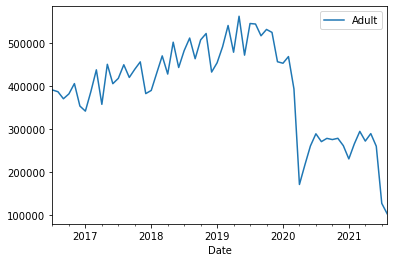

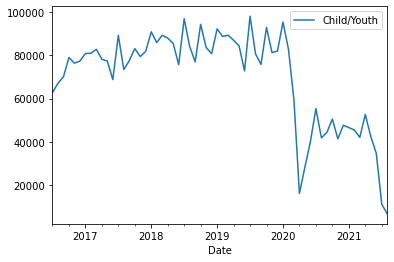

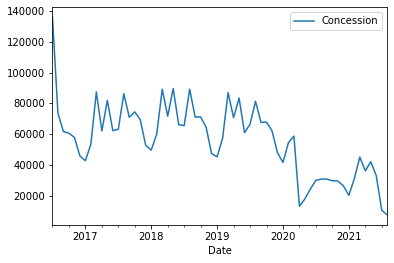

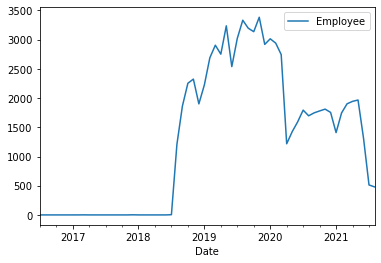

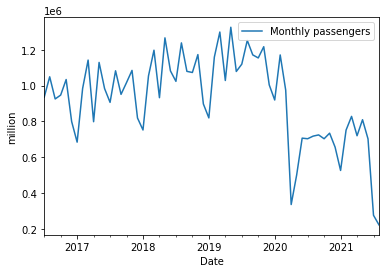

In [94]:
data.plot('Date','Adult')
data.plot(x='Date',y='Child/Youth')
data.plot(x='Date',y='Concession')
data.plot(x='Date',y='Employee')
data.plot(ylabel='million',x='Date',y='Monthly passengers')

<AxesSubplot:xlabel='Date'>

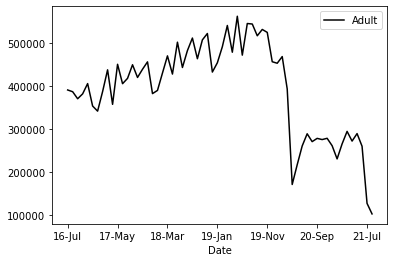

In [6]:
data.plot.line(x='Date',y='Adult', c='Black')

#### The lock down  in 2020 happened at March, which means that from July 2016 till March 2020 there are 45 months in between, and 17 months after the break out (until July 2021).

In [98]:
train, test = train_test_split(data, test_size=0.27, random_state=142)
print(train.shape)
print(test.shape)

(45, 13)
(17, 13)


In [106]:
data.Date 

0    2016-07-01
1    2016-08-01
2    2016-09-01
3    2016-10-01
4    2016-11-01
        ...    
57   2021-04-01
58   2021-05-01
59   2021-06-01
60   2021-07-01
61   2021-08-01
Name: Date, Length: 62, dtype: datetime64[ns]

In [110]:
x_train = train[['Date','Adult']]
y_train = train['Adult']

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [108]:
predicted = reg.predict(x_train)
mse = ((np.array(y_train)-predicted)**2).sum()/len(y_train)
r2 = r2_score(y_train, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.0
R Squared: 1.0


In [10]:
#explain why MSE is too big, or try to find other matrix
#how to predict things based on time(time series analysis)

AttributeError: 'LinearRegression' object has no attribute 'coef_reg'